# When Linear Models Fail

Linear regression is a powerful but limited tool.
This notebook explores situations where linear model assumptions
are violated, even when a relationship exists between variables.


In previous notebooks, a linear relationship was modeled and interpreted.
Here, we examine how departures from model assumptions affect interpretation
and reliability.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/example_relationships.csv")

X = df[['x']]
y = df['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


## Case 1: Non-linearity

A linear model assumes that the relationship between variables
can be adequately approximated by a straight line.


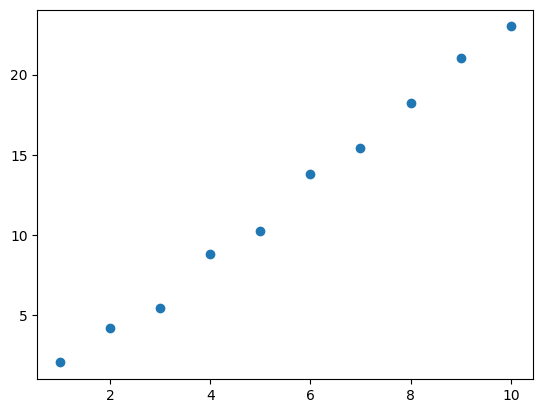

In [3]:
df['y_nonlinear'] = y + 0.05 * (df['x'] ** 2)

plt.scatter(df['x'], df['y_nonlinear'])
plt.show()


Although a trend is visible, the relationship is clearly non-linear.
A linear regression would systematically misrepresent this pattern.


## Case 2: Heteroscedasticity

Linear regression assumes constant variance of errors.
Violations of this assumption can distort interpretation.


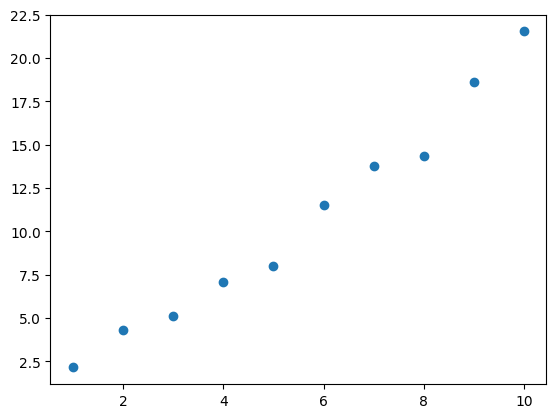

In [4]:
noise = np.random.normal(0, df['x'] * 0.2)
df['y_hetero'] = y + noise

plt.scatter(df['x'], df['y_hetero'])
plt.show()


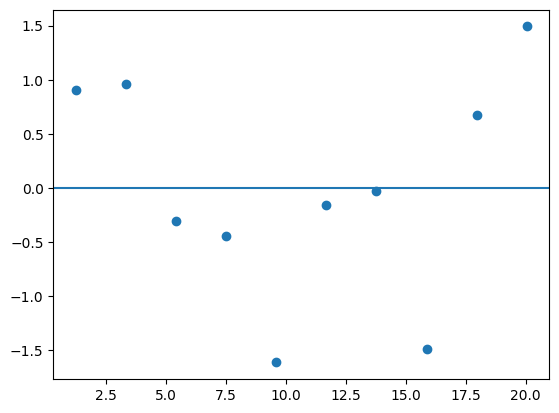

In [5]:
model.fit(X, df['y_hetero'])
y_pred_hetero = model.predict(X)
residuals = df['y_hetero'] - y_pred_hetero

plt.scatter(y_pred_hetero, residuals)
plt.axhline(0)
plt.show()


When residual variance increases with predicted values,
the assumption of constant variance is violated.
This can lead to unreliable coefficient estimates and
misleading confidence in model results.


## Key Takeaway

Linear models are useful approximations, not universal solutions.
Understanding when their assumptions fail is as important as
knowing how to fit them.
